Первое задание

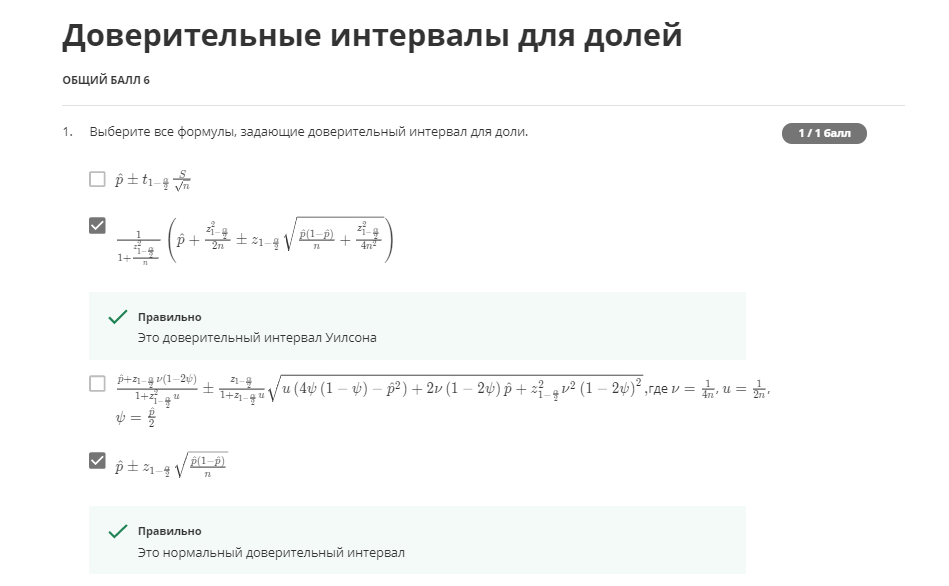


Второе задание

Большая часть млекопитающих неспособны во взрослом возрасте переваривать лактозу, содержащуюся в молоке. У людей за расщепление лактозы отвечает фермент лактаза, кодируемый геном LCT. У людей с вариантом 13910T этого гена лактаза продолжает функционировать на протяжении всей жизни. Распределение этого варианта гена сильно варьируется в различных генетических популяциях.

Из 50 исследованных представителей народа майя вариант 13910T был обнаружен у одного. Постройте нормальный 95% доверительный интервал для доли носителей варианта 13910T в популяции майя. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки.

In [31]:
import numpy as np
from statsmodels.stats.proportion import proportion_confint

In [32]:
statistical_population = np.random.randint(1, size = 50) 
statistical_population[4] = 1
statistical_population

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [33]:
statistical_population.mean()

0.02

In [38]:
normal_interval = proportion_confint(sum(statistical_population), len(statistical_population), method = 'normal')
normal_interval

(0.0, 0.05880530708179099)

Этот метод округляет до 0 значения, близкие к 1. Поэтому юзается метод без округления (взят из библиотеки, модиифицрован)

In [43]:
from scipy import stats, optimize

def my_proportion_confint(count, nobs, alpha=0.05, method='normal'):
    q_ = count * 1. / nobs
    alpha_2 = 0.5 * alpha
    std_ = np.sqrt(q_ * (1 - q_) / nobs)
    dist = stats.norm.isf(alpha / 2.) * std_
    ci_low = q_ - dist
    ci_upp = q_ + dist
    return ci_low, ci_upp

In [44]:
my_proportion_confint(1,50)

(-0.018805307081790987, 0.05880530708179099)

Третье задание

В условиях предыдущей задачи постройте 95% доверительный интервал Уилсона для доли носителей варианта 13910T в популяции майя. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки.

In [35]:
wilson_interval = proportion_confint(sum(statistical_population), len(statistical_population), method = 'wilson')
wilson_interval 

(0.003539259271646236, 0.10495443589637815)

Четвертое задание

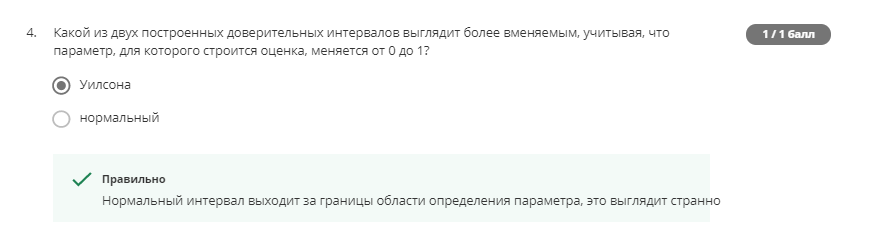

Пятое задание.

Пусть в популяции майя действительно 2% носителей варианта 13910T, как в выборке, которую мы исследовали. Какой объём выборки нужен, чтобы с помощью нормального интервала оценить долю носителей гена 13910T с точностью \pm0.01±0.01 на уровне доверия 95%?

In [24]:
from statsmodels.stats.proportion import samplesize_confint_proportion

In [23]:
n_samples = int(np.ceil(samplesize_confint_proportion(statistical_population.mean(), 0.01)))
n_samples

753

Шестое задание.

Постройте график зависимости объёма выборки, необходимого для оценки для доли носителей гена 13910T с точностью ±0.01 на уровне доверия 95%, от неизвестного параметра p. Посмотрите, при каком значении p нужно больше всего испытуемых. Как вы думаете, насколько вероятно, что выборка, которую мы анализируем, взята из случайной величины с этим значением параметра?

Как бы вы не ответили на последний вопрос, рассмотреть объём выборки, необходимый при таком p, всё равно полезно — это даёт максимально пессимистичную оценку необходимого объёма выборки.

Какой объём выборки нужен в худшем случае, чтобы с помощью нормального интервала оценить долю носителей гена 13910T с точностью ±0.01 на уровне доверия 95%?
